# <p style="color:teal;">Исследование объявлений о продаже квартир</p>
<div class = "alert alert-info" style = "border-color: info; border-radius: 5px"> 
    <font color = 'black'>
В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

**Задача** — изучить данные и выполнить предобработку, выявить закономерности. Установить параметры - это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 




**Вопросы, на которые необходимо дать ответ в итоге работы:**

- Какие факторы больше всего влияют на общую (полную) стоимость объекта?
- Какие есть населённые пункты с самой высокой и низкой стоимостью квадратного метра?
- Как стоимость объектов зависит от расстояния до центра города?

## Откройте файл с данными и изучите общую информацию 

Для начала нужно вывести таблицу, чтобы посмотреть на первоначальные данные, и затем сделать первые выводы, исходя из информации по столбцам и основным показателям по ним.

In [ ]:
# Импортируем библиотеки, которые нам понадобятся
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [ ]:
# Зададим переменную для прочтения файла и разделим колонки с помощью sep, чтобы привести данные в вид таблицы
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [ ]:
# Отобразим все столбцы
pd.set_option('display.max_columns', None)

In [4]:
# Выведем первые пять строк таблицы
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
# Просмотрим данные по каждому столбцу, выведем общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

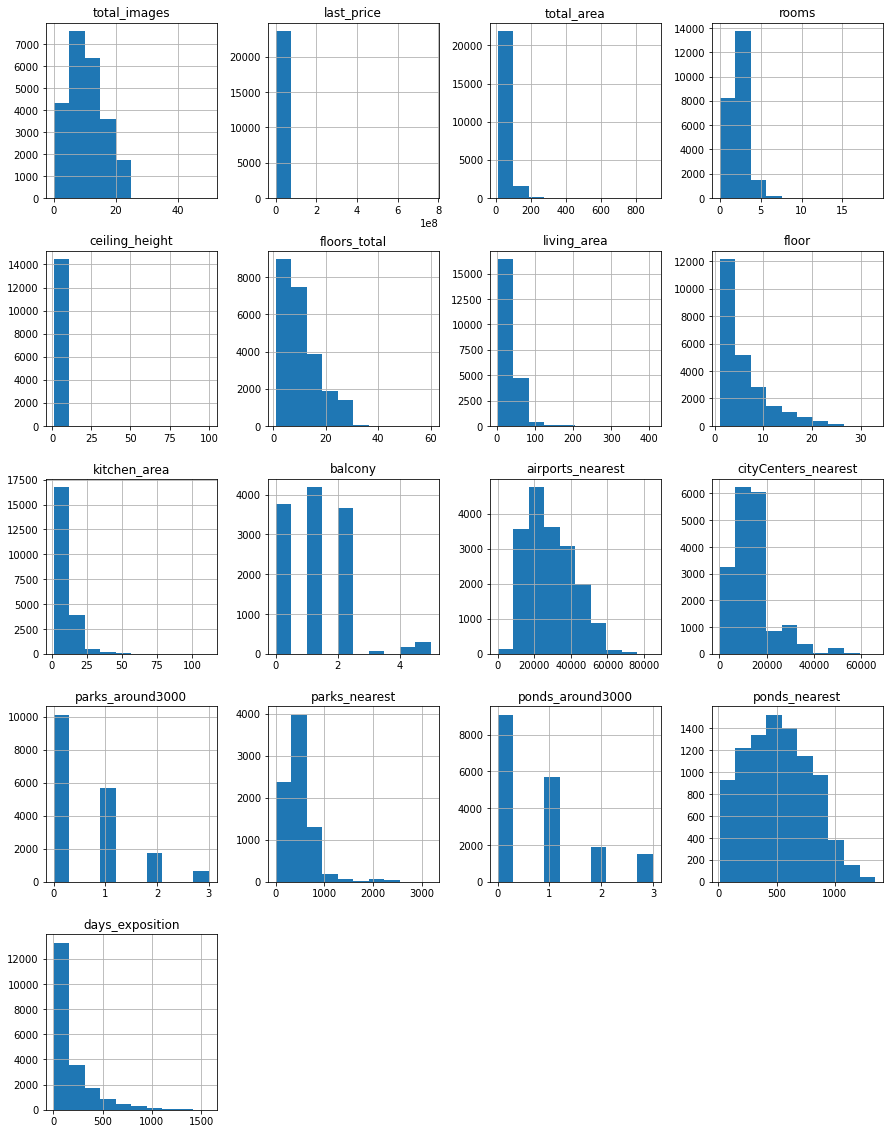

In [6]:
# Построим гистограммы для всех числовых столбцов таблицы
data.hist(figsize = (15, 20));

In [7]:
# Просмотрим основные показатели по столбцам
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


<div style="border:solid teal 4px; padding: 40px">

**Вывод**
    
Из 22 столбцов только 8 не имеют пропусков, если судить по таблице с общей информацией. 
    
По гистограммам лучше смотреть отдельно данные по каждому столбцу, но уже сейчас, мы можем понять, что, например, в данных по `last_price` (цене) есть выбросы, так как по  гистограмме столбца видно предел наибольшей части данных - 100 тыс. рублей, а в таблице показателей указан максимум более 700 тыс. рублей. Гистограмму надо будет просмотреть детальнее и узнать конверсию таких выбросов. Также смущают данные по `ceiling_height` (высоте потолков) - в таблице показателей указан максимум в 100 метров. 

## Предобработка данных

<div class = "alert alert-info" style = "border-color: info; border-radius: 5px"> 
    <font color = 'black'>
 
**Что нужно сделать на этом шаге:**
    
1. Изучить пропуски, в каких столбцах они имеются и насколько они значимы для нашего дальнейшего анализа
2. Заполнить пропуски в тех столбцах, в которых это будет разумно и возможно
3. Найти и преобразовать столбцы, в которых нужно изменить тип данных 
4. Изучить уникальные значения в столбце с названиями и устранить неявные дубликаты
5. Устранить редкие и выбивающиеся значения в данных
 

   





### Изучим пропуски

In [8]:
# Найдем сколько имеется пропусков в каждом столбце
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div style="border:solid teal 4px; padding: 40px">

Итак, пропуски обнаружены в следующих столбцах:
    
- `ceiling_height` - высота потолков
- `floors_total` - количество этажей в доме
- `living_area` - жилая площадь
- `is_apartment` - апартаменты
- `kitchen_area` - площадь кухни
- `balcony` - число балконов
- `locality_name` - название населённого пункта
- `airports_nearest` - расстояние до ближайшего аэропорта   
- `cityCenters_nearest` - расстояние до центра города      
- `parks_around3000` - число парков в радиусе 3 км         
- `parks_nearest` - расстояние до ближайшего парка           
- `ponds_around3000` - число водоёмов в радиусе 3 км         
- `ponds_nearest` - расстояние до ближайшего водоёма           
- `days_exposition` - сколько дней было размещено объявление (от публикации до снятия)  
    
Нужно проанализировать каждый столбец по отдельности и избавиться от пропусков и аномалий там, где это будет возможно и рационально.
    
Эти столбцы не будут анализироваться, так как не пригодятся в работе:
    
- `parks_around3000` - число парков в радиусе 3 км                   
- `ponds_around3000` - число водоёмов в радиусе 3 км         
- `ponds_nearest` - расстояние до ближайшего водоёма 

### ceiling_height - высота потолков

In [9]:
# Выявим количество пропусков в столбце
data['ceiling_height'].isna().sum()

9195

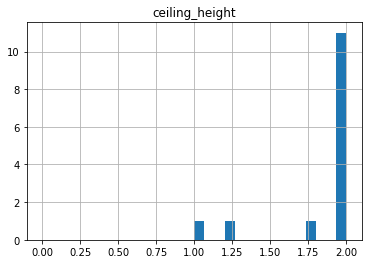

In [10]:
# Посмотрим на гистаграмму c диапазоном от 0 до 2 метров
data.hist('ceiling_height', bins = 30, range = (0,2));

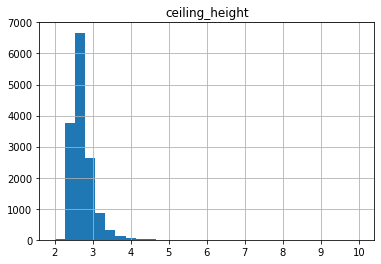

In [11]:
# Посмтрим на гистаграмму c диапазоном от 2 до 10 метров
data.hist('ceiling_height', bins = 30, range = (2,10));

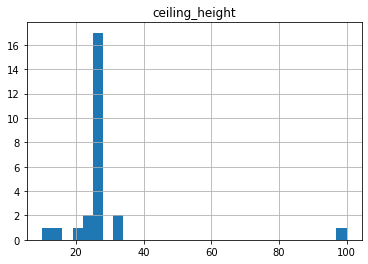

In [12]:
# Посмотрим на гистаграмму c диапазоном от 10 до 100 метров
data.hist('ceiling_height', bins = 30, range = (10,100));

По полученным гистограммам видно, что в данных есть аномалии: чересчур завышенные или заниженные значения. Стандартная высота потолков - от 2,5 до 3,5 метров, поэтому значения ниже 2 и выше 4 метров уже вызывают подоздрения. Есть несколько квартир с потолками выше 10 метров (включая один со 100 метрами) и несколько ниже 2 метров (возможно это подвальные помещения). Желательно избавиться от этих значений, если таких квартир мало. Однако можно предположить, что некоторые значения были случайно заполнены неправильно, например, высота 25 метров на самом деле 2,5 метра, просто пропустили запятую. Поэтому можно изменить эти значения в диапозоне 20 до 40 метров (более менее приемлемые), поделив на 10

In [13]:
# Поделим высоту потолков в районе от 20 до 40 на 10
data.loc[(data['ceiling_height'] > 20) & (data['ceiling_height'] <= 40), 'ceiling_height'] = \
data.loc[(data['ceiling_height'] > 20) & (data['ceiling_height'] <= 40), 'ceiling_height'] / 10

In [14]:
# Посчитаем количество квартир с потолками ниже 2 метров и выше 4
len(data.query('(ceiling_height < 2) | (ceiling_height > 4 )'))

57

In [15]:
# Посчитаем конверсию таких квартир
(len(data.query('(ceiling_height < 2) | (ceiling_height > 4 )')) / len(data)) * 100

0.24051647748850163

Процент квартир с потолками ниже 2 метров и выше 4 составляет всего 0,2% от общего числа, поэтому можем их убрать для дальнейших расчетов

In [16]:
# Сохраним в общей таблице данные с потолками от 2 до 4 метров
data = data.loc[((data['ceiling_height'] >= 2) & (data['ceiling_height'] <= 4)) | data['ceiling_height'].isna()]

In [17]:
# Проверим удаление
len(data)

23642

Мы убали 57 квартир, осталось разобраться с пропусками. Заполнить пропуски мы можем с помощью медианы этого столбца, так как высота потолков не имеет сильной взаимосвязи с другими параметрами.

In [18]:
# Заполним пропуски медианой по столбцу
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

In [19]:
# Проверим на наличие пропусков
data['ceiling_height'].isna().sum()

0

###  floors_total - количество этажей в доме

In [20]:
# Выявим количество пропусков в столбце
data['floors_total'].isna().sum()

86

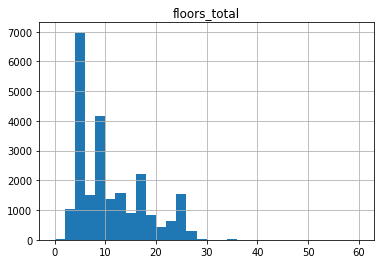

In [21]:
# Посмотрим на гистаграмму 
data.hist('floors_total', bins = 30, range = (0,60));

Основная масса количества этажей приходится на промежутке до 10, что логично. Также по графику не заметны аномалии, но их можно проверить с помощью уникальных значений.

In [22]:
# Просмотрим уникальные значения по столбцу и их количество
data['floors_total'].value_counts().sort_values()

33.0       1
29.0       1
34.0       1
52.0       1
60.0       1
36.0       3
28.0      21
35.0      24
1.0       25
26.0     123
21.0     158
27.0     164
11.0     203
13.0     229
20.0     271
22.0     286
19.0     339
23.0     352
15.0     365
2.0      382
8.0      389
24.0     469
18.0     505
14.0     552
7.0      586
3.0      659
17.0     832
6.0      906
25.0    1075
10.0    1174
4.0     1193
12.0    1361
16.0    1373
9.0     3760
5.0     5772
Name: floors_total, dtype: int64

Больше всего вызывают сомнения дома с этажами 52 и 60, но таких домов всего по одному и возможно этажей действительно столько, поэтому можно оставить, не будут мешать дальнейшему анализу.

In [23]:
# Посмотрим конверсию
(data['floors_total'].isna().sum() / len(data)) * 100

0.3637594112173251

Процент числа пропусков в данном случае довольно мал - 0,3. Поэтому мы можем их оставить как есть, но также можем заменить на указанный этаж соответствующей квартиры. Сделаем так.

In [24]:
# Заменяем пропуски на этаж квартиры
data['floors_total'] = data['floors_total'].fillna(data['floor'])

### living_area - жилая площадь и total_area - общая площадь

In [25]:
# Выявим количество пропусков в столбце
data['living_area'].isna().sum()

1897

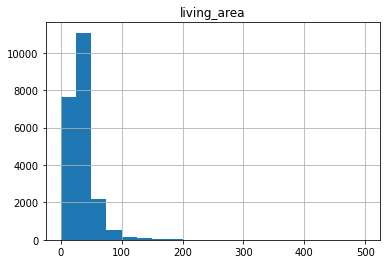

In [26]:
# Посмотрим на гистаграмму 
data.hist('living_area', bins = 20, range = (0,500));

Явных аномалий не заметно. Большая часть приходится на диапазон до 50 метров квадратных. Площадь однокомнатной квартиры не должна быть меньше 14 квадратных метров (судья по нормам в интернете), поэтому можем посмотреть, есть ли такая жилая площадь в наших данных. 

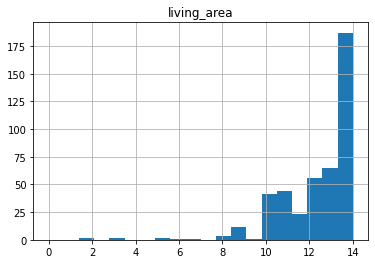

In [27]:
# Посмотрим на гистаграмму c диапазоном от 0 до 14 кв. метров
data.hist('living_area', bins = 20, range = (0,14));

In [28]:
# Узнаем количество квартир с жилой площадью меньше 14 кв. метров
len(data.query('living_area < 14'))

322

Довольно большое количество квартир с данной жилой площадью, однако от общего количества составляет чуть больше 1%, поэтому можем их вытеснить из нашей таблицы. Такие данные могли быть получены ошибкой ввода, или другими причинами, но так как мы активно дальше будем использовать значения жилой площади, то лучше их очистить.

In [29]:
# Оставим в общей таблице только те строки, где жилая площадь больше 14 кв. метров и где есть пропуски у данного параметра
data = data.loc[(data['living_area'] > 14) | (data['living_area'].isna())]

In [30]:
# Проверим удаление
len(data)

23202

Перед заполнением пропусков в жилой площади можем проверить как она соотносится с обшей площадью.

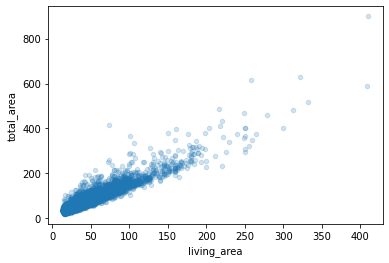

In [31]:
# Посмотрим есть ли зависимость жилой площади от общей площади квартиры, построим диаграмму рассеяния
data.plot(x = 'living_area', y = 'total_area', kind = 'scatter', alpha = 0.2);

По диаграмме видна линейная зависимость, поэтому мы можем заполнить пропуски в жилой площади по среднему значению, но для начала нужно посмотреть на возможные выбросы в общей площади.

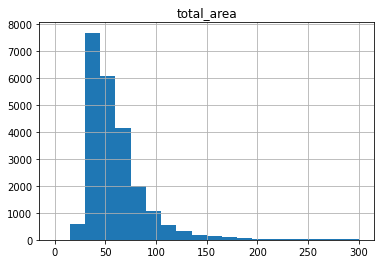

In [32]:
# Посмотрим на гистаграмму общей площади
data.hist('total_area', bins = 20, range = (0,300));

Большинство квартир до 200 кв. метров. В первой таблице по показателям (которое мы делали методом `describe()`) написано, что максимальная общая площадь составляет 900 кв. метров. Посмотрим сколько значений после 250 кв. м.

In [33]:
# Узнаем сколько квартир имеют жилую площадь свыше 250 метров
len(data.query('total_area > 250'))

103

Не будем сокращать данные до 200 кв. метров, так как лучше не удалять слишком много, поэтому сохраним данные до 250 кв. метров (это всего 0,4% от общего количества квартир, поэтому мы можем себе это позволить)

In [34]:
# Оставим в общей таблице только те строки, где общая площадь менее 250 кв. метров
data = data.loc[(data['total_area'] <= 250)]

In [35]:
# Проверим удаление
len(data)

23099

Теперь можем заполнить пропуски в данных по жилой площади с помощью средней через отношение жилой площади к общей

In [36]:
# Заполним пропуски средним значением по столбцу
data['living_area'] = data['living_area'].fillna(data['total_area']*((data['living_area'] / data['total_area']).mean()))

In [37]:
# Выявим количество пропусков в столбце теперь
data['living_area'].isna().sum()

0

### balcony - число балконов

In [38]:
# Выявим количество пропусков в столбце
data['balcony'].isna().sum()

11207

Пропусков много, однако есть очень высокая вероятность, что раз продавец не указал число балконов, значит их нет, поэтому мы бы могли заменить их на 0.

In [39]:
## Заменим пропуски на 0
data.loc[data['balcony'].isna(), 'balcony'] = 0

In [40]:
# Выявим количество пропусков в столбце теперь
data['balcony'].isna().sum()

0

### kitchen_area - площадь кухни

In [41]:
# Выявим количество пропусков в столбце
data['kitchen_area'].isna().sum()

2198

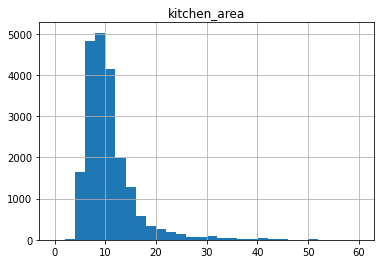

In [42]:
# Посмотрим на гистаграмму 
data.hist('kitchen_area', bins = 30, range = (0,60));

Стандартная площадь кухни варьируется где-то в районе 10 кв. метров, что мы в целом и видим на нашей гистаграмме. Также заметно, что есть какое-то количество квартир после 40 кв. метров, надо узнать, сколько их всего.

In [43]:
# Узнаем сколько квартир имеет площадь кухни выше 40 кв. метров
len(data.query('kitchen_area > 40'))

103

Это 0,4% от общего числа. Можем сократить для дальнейших расчетов.

In [44]:
# Оставим в общей таблице только те строки, где площадь кухни менее 40 кв. метров и где есть пропуски
data = data.loc[(data['kitchen_area'] <= 40) | (data['kitchen_area'].isna())]

In [45]:
# Проверим удаление
len(data)

22996

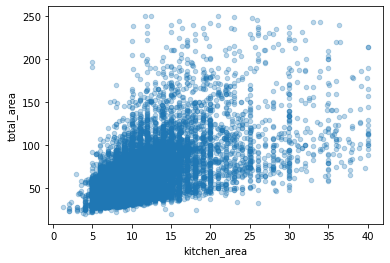

In [46]:
# Посмотрим есть ли зависимость площади кухни от общей площади квартиры, построим диаграмму рассеяния
data.plot(x = 'kitchen_area', y = 'total_area', kind = 'scatter', alpha = 0.3);

In [47]:
# Узнаем корреляцию по площади кухни и общей площади
data['kitchen_area'].corr(data['total_area'])

0.5851679654858557

Нельзя назвать корреляцию сильной, но тем не менее она есть, поэтому можем заполнить пропуски на основе среднего значения общей площади

In [48]:
# Заполним пропуски средним значением по столбцу
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']*((data['kitchen_area'] / data['total_area']).mean()))

In [49]:
# Выявим количество пропусков в столбце теперь
data['kitchen_area'].isna().sum()

0

### is_apartment - апартаменты

In [50]:
# Выявим количество пропусков в столбце
data['is_apartment'].isna().sum()

20288

In [51]:
# Просмотрим уникальные значения
data['is_apartment'].value_counts()

False    2665
True       43
Name: is_apartment, dtype: int64

In [52]:
# Поменяем тип данный на bool (стоит object)
data['is_apartment'] = data['is_apartment'].astype('bool')

In [53]:
# Проверяем изменение
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22996 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22996 non-null  int64  
 1   last_price            22996 non-null  float64
 2   total_area            22996 non-null  float64
 3   first_day_exposition  22996 non-null  object 
 4   rooms                 22996 non-null  int64  
 5   ceiling_height        22996 non-null  float64
 6   floors_total          22996 non-null  float64
 7   living_area           22996 non-null  float64
 8   floor                 22996 non-null  int64  
 9   is_apartment          22996 non-null  bool   
 10  studio                22996 non-null  bool   
 11  open_plan             22996 non-null  bool   
 12  kitchen_area          22996 non-null  float64
 13  balcony               22996 non-null  float64
 14  locality_name         22949 non-null  object 
 15  airports_nearest   

В данном случае лучше оставить пропуски, так как их слишком много. К тому же мы не будем их использовать в дальнейшем при анализе.

### last_price - цена на момент снятия с публикации и rooms - количество комнат

В самом начале с помощью вызова информативной таблицы мы не выявили в этих столбцах пропусков, однако мы будем использовать эти данные в дальнейшем, поэтому нужно просмотреть их на наличие аномалий.

(-500.0, 20000000.0)

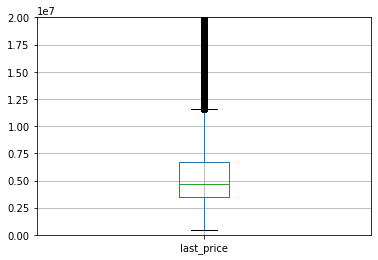

In [54]:
data.boxplot('last_price');
plt.ylim(- 500, 0.2e8)

По графику мы видим, что аномальных значений много и они начинаются примерно от цены в 11,5 млн. Медиана находится в районе 5 млн, то есть практически половина цен меньше 5 млн, основная масса данных приходится на промежуток от 3 до 7 млн руб.

In [55]:
# Посчитаем какое потенциальное количество аномальных значений
len(data.query('last_price > 11500000'))

1911

1911 - это примерно 8% от общего количества квартир. Можем взять диапазон чуть шире.

In [56]:
# Возьмем число больше, чтобы сократить процент от общего числа
len(data.query('last_price > 14500000'))

1103

1103 - это примерно 4,8% - теперь можем сделать нужный срез данных

In [57]:
# Сократим данные в общей таблице с ценой до 14,5 млн руб.
data = data.loc[(data['last_price'] <= 14500000)]

In [58]:
# Проверим новое число строк
len(data)

21893

Теперь посмотрим на данные по количеству комнат

In [59]:
# Посмотрим какой максимум по комнатам
data['rooms'].max()

7

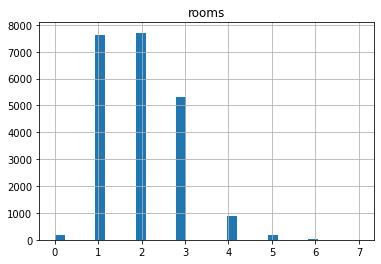

In [60]:
# Посмотрим на гистаграмму 
data.hist('rooms', bins = 30, range = (0,7));

In [61]:
# Посмотрим сколько квартир указано с количеством комнат равным 0
len(data.query('rooms == 0'))

178

Количество небольшое, всего 0,8% от общего числа квартир, и тут не ясно, что имел в виду продавец, может это свбодная планировка или студия, поэтому лучше оставить эти данные как есть.

### airports_nearest - расстояние до ближайшего аэропорта

In [62]:
# Выявим количество пропусков в столбце
data['airports_nearest'].isna().sum()

5379

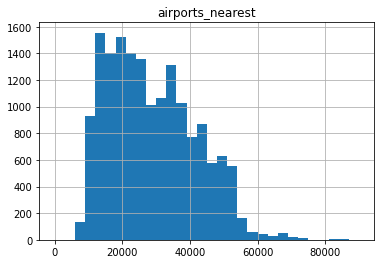

In [63]:
# Посмотрим на гистаграмму 
data.hist('airports_nearest', bins = 30, range = (0,90000));

В целом если смотреть только на гистаграмму, то ничего не смущает, расстояние может быть совершенно разное, это зависит и от самого населенного пункта, и от географической расположенности и т.д. Единственное можно проверить минимальное значение.

In [64]:
data['airports_nearest'].min()

0.0

Нулевое расстояние не может быть. Посчитаем сколько таких значений.

In [65]:
len(data.query('airports_nearest == 0'))

1

Всего одна квартира. В целом можем ее убрать.

In [66]:
data = data.loc[(data['airports_nearest'] != 0)]

In [67]:
# Проверим новое число строк
len(data)

21892

Что касается пропусков, то их придется оставить как есть, так как данные являются картографическими, и проставлять одинаковые значения для квартир будет неправильно, так как сами объекты могут располагаться на большом расстоянии друг от друга. 

### cityCenters_nearest - расстояние до центра города

In [68]:
# Выявим количество пропусков в столбце
data['cityCenters_nearest'].isna().sum()

5364

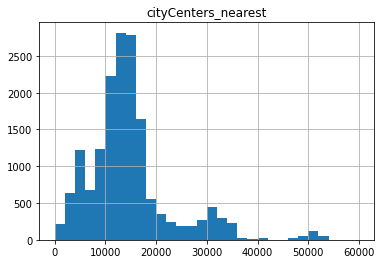

In [69]:
# Посмотрим на гистаграмму 
data.hist('cityCenters_nearest', bins = 30, range = (0,60000));

В целом выглядит правдоподобно, но можем сократить данные до 35 км

In [70]:
# Узнаем сколько всего квартир записано с расстоянием до центра свыше 35 км
len(data.query('cityCenters_nearest > 35000'))

413

In [71]:
# Сократим данные в общей таблице до нужного среза
data = data.loc[(data['cityCenters_nearest'] <= 35000) | (data['cityCenters_nearest'].isna())]

In [72]:
# Проверим количество данных после удаления
len(data)

21479

In [73]:
# Приведем название колонки в нормальный вид
data = data.rename(columns = {'cityCenters_nearest' : 'city_centers_nearest'})

### days_exposition - сколько дней было размещено объявление и first_day_exposition - дата публикации

In [74]:
# Выявим количество пропусков в столбце days_exposition
data['days_exposition'].isna().sum()

2691

Пропуски в данном случае могут означать, что публикация еще не снята, поэтому заполнять их не стоит

In [75]:
# Изменим формат и тип данных для столбца с датой публикации, так как нам нужно будет это для следующих шагов
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S'
)

In [76]:
# Проверим изменения
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,True,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,True,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,True,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.400000,5,True,False,False,9.1,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
7,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,40.712205,22,True,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN


### parks_nearest - расстояние до ближайшего парка

In [77]:
# Выявим количество пропусков в столбце
data['parks_nearest'].isna().sum()

14615

Пропусков слишком много - больше половины всего датасета, лучше их не заполнять, чтобы не исказить данные.

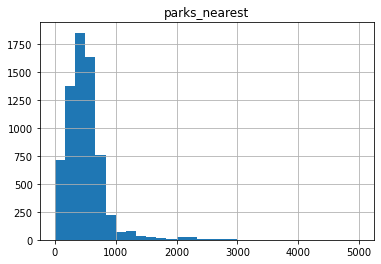

In [78]:
# Посмотрим на гистаграмму 
data.hist('parks_nearest', bins = 30, range = (0,5000));

In [79]:
# Посмотрим сколько завышенных значений по сравнению с другими
len(data.query('parks_nearest > 2000'))

81

Не так много по отношению к обещму числу (21479), можем оставить

### locality_name - название населённого пункта

In [80]:
# Выявим количество пропусков в столбце
data['locality_name'].isna().sum()

44

In [81]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Мурино', 'Сертолово', 'Петергоф', 'Пушкин',
       'посёлок Парголово', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', '

Пропусков здесь мало - около 2%, лучше оставим их. Здесь нужно разобраться с неявными дубликатами в названиях населенных пунктов. Нужно просмотреть список уникальных названий и выявить те, которые необходимо объединить.

In [82]:
# Приведем к одному виду названия, где есть буква ё, изменим её на обычную е для удобства
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [83]:
# Приведем к одному виду найденные неявные дубликаты
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')
data['locality_name'] = data['locality_name'].str.replace('поселок Мурино', 'Мурино')
data['locality_name'] = data['locality_name'].str.replace('деревня Кудрово', 'Кудрово')
data['locality_name'] = data['locality_name'].str.replace('село Никольское', 'Никольское')
data['locality_name'] = data['locality_name'].str.replace('поселок Лубань', 'Лубань')
data['locality_name'] = data['locality_name'].str.replace('поселок станции', 'поселок при железнодорожной станции')

In [84]:
# Проверяем
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары',
       'поселок городского типа Янино-1', 'Мурино', 'Сертолово',
       'Петергоф', 'Пушкин', 'поселок Парголово', 'Кудрово', 'Коммунар',
       'Колпино', 'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',

Узнаем, сколько всего мы удалили данных по итогу обработки:

In [85]:
(23699 - 21479) / 23699

0.09367483860078485

9% в итоге мы срезали из изначальной таблицы. Конечно, было бы лучше срезать меньше, но в целом это входит в предел 10% среза, поэтому продолжаем анализ.

## Посчитайте и добавьте в таблицу новые столбцы

<div class = "alert alert-info" style = "border-color: info; border-radius: 5px"> 
    <font color = 'black'>
        
**Добавим в таблицу следующие столбцы:**
        
- цена одного квадратного метра;
- день недели публикации объявления;
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры;
- расстояние до центра города в километрах

### цена одного квадратного метра

In [86]:
data['price_for_meter'] = data['last_price'] / data['total_area']

### день недели публикации объявления

In [87]:
data['weekday'] = data['first_day_exposition'].dt.weekday

### месяц публикации объявления

In [88]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

### год публикации объявления

In [89]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

### тип этажа квартиры

In [90]:
# Напишем функцию для определения типа этажа (первый, последний или другой)
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'

data['floor_type'] = data.apply(floor_type, axis = 1)

### расстояние до центра города в километрах

In [91]:
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round()

Просмотрим получившиеся столбцы в таблице

In [92]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,weekday,month,year,floor_type,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,True,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,True,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,True,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.400000,5,True,False,False,9.1,0.0,поселок городского типа Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой,NaN
7,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,40.712205,22,True,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другой,12.0


## Проведите исследовательский анализ данных

<div class = "alert alert-info" style = "border-color: info; border-radius: 5px"> 
    <font color = 'black'>
        
- Изучаем параметры по гистограммам
- Изучаем как быстро продавались квартиры
- Отвечаем на вопрос: **"Какие факторы больше всего влияют на общую стоимоcть объекта?"**
- Отвечаем на вопрос: **"Какие населенные пункты имеют самую низкую и самую высокую стоимость квадратного метра?"**
- Отвечаем на вопрос: **"Как стоимость объектов зависит от расстояния до центра города?"**

### Изучаем отдельные параметры по гистограммам

#### Общая площадь

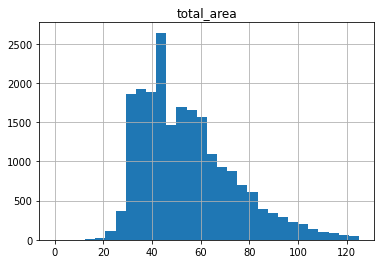

In [93]:
data.hist('total_area', bins = 30, range = (0, 125));

По диаграмме можно увидеть, что основной массив приходится на ппромежуток от 25 до 75 кв. м. Присутствует также большой скачок на 45 кв. м. - много квартир с такой общей площадью

#### Жилая площадь

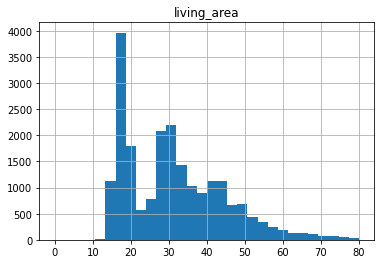

In [94]:
data.hist('living_area', bins = 30, range = (0, 80));

Довольно много квартир с маленькой жилой площадью - до 20 кв. м., значит преобладают небольшие квартиры по площади на рынке

#### Площадь кухни

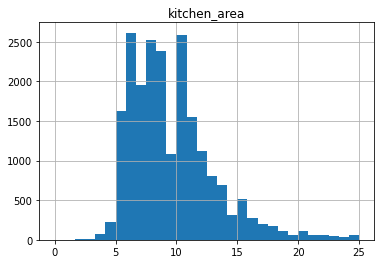

In [95]:
data.hist('kitchen_area', bins = 30, range = (0, 25));

В основном квартиры имеют кухни с площадью меньше 10 кв. м., что стандартно. Но это чаще всего зависит от самого дома и его планировки

#### Цена объекта

In [96]:
# Поделим цены на 1 млн, чтобы гистограммы было легче интерпретировать
data['last_price'] = data['last_price'] / 1000000

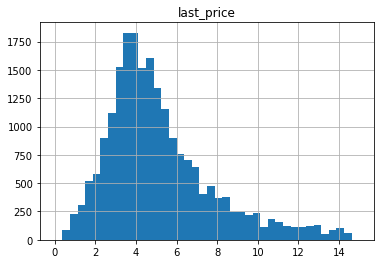

In [97]:
data.hist('last_price', bins = 40, range = (0, 15));

Квартиры делятся по цене примерно на меньше 4,5 млн руб. и больше этого значения. Меньше 2 млн стоят около 200 квартир, но большая часть стоит в районе 4 млн руб.

#### Количество комнат

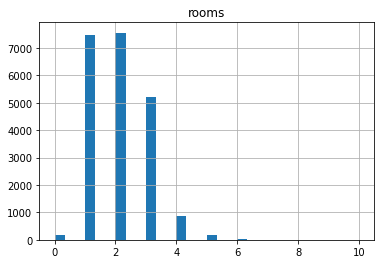

In [98]:
data.hist('rooms', bins = 30, range = (0, 10));

Больше всего квартир с 2мя комнатами, хотя однокомнатных практически столько же. Четырехкомнатных заметно меньше, чем меньше 1000, хотя трехкомнатных более 5000. В целом это нормальные показатели, квартир с одной и двумя комнатами всегла больше на рынке недвижимости

#### Высота потолков

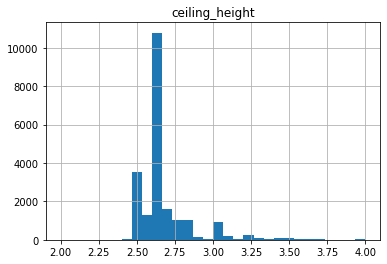

In [99]:
data.hist('ceiling_height', bins = 30, range = (2, 4));

Наибольшая часть квартир, что очень заметно по графику, приходится на 2.60-2.65 м высоты потолков. Это не удивительно, ведь сейчас в новостройках делают такую высоту потолков, а для элитного жилья показатель будет свыше 3 м.

#### Этаж квартиры

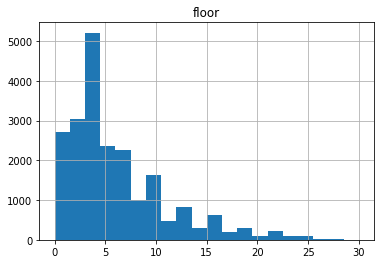

In [100]:
data.hist('floor', bins = 20, range = (0, 30));

Чаще всего можно встретить 3 и 4 этажи, а большинство квартир с этажами, которые начинаются от 10-15, скорее всего в Санкт-Петерубрге, так как в выборке много поселков и деревень, где редко встретишь высотки

#### Тип этажа квартиры

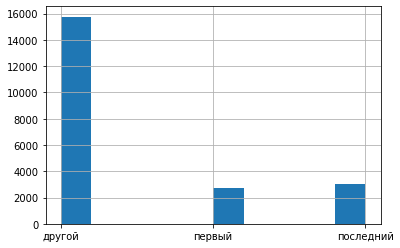

In [101]:
data['floor_type'].hist();

График и данные не удивительные, так как в тип "другие" входят все остальные этажи, а квартир на первом этаже и на последнем практически одинаковое количество

#### Общее количество этажей в доме

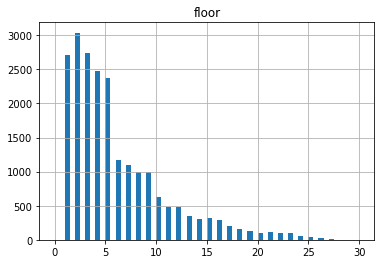

In [102]:
data.hist('floor', bins = 60, range = (0, 30));

Большинство квартир находтся в домах, где не больше 5 этажей, это также объясняется выборкой, среди которых у нас в основном поселки и деревни

#### Расстояние до центра города в метрах

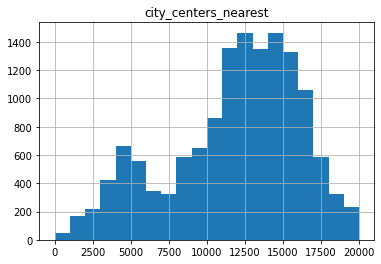

In [103]:
data.hist('city_centers_nearest', bins = 20, range = (0, 20000));

Большинство квартир находится примерно в 15 км от центра города, но в данном случае многие приближенные к Санкт-Петербургу населенные пункты могли бы указывать на центр СПб, например, Пушкин является частью Санкт-Петербурга, и поэтому можно было бы рассматривать центр как центр СПб

#### Расстояние до ближайщего аэропорта

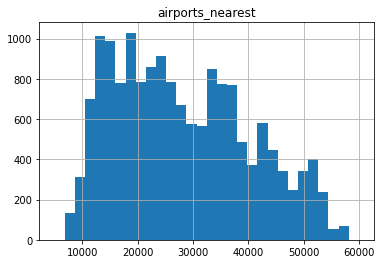

In [104]:
data.hist('airports_nearest', bins = 30, range = (5000, 60000));

Многие продавцы вносят данные про близость аэропорта только если они действительно близко находятся, поэтому чем дальше аэропорт, тем реже о нем упоминают в объявлениях. 

#### Расстояние до ближайшего парка

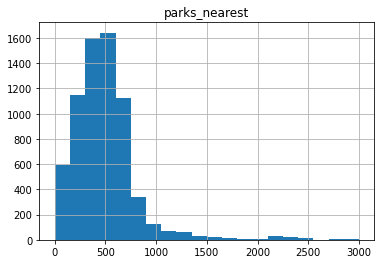

In [105]:
data.hist('parks_nearest', bins = 20, range = (0, 3000));

У большинства квартир (хоть данных и было мало без пропусков) парки расположены примерно в 500 метрах, это логично, учитывая населенные пункты, в одном маленьком городе Пушкине в Санкт-Петербурге около 5 парков.

#### день и месяц публикации объявления

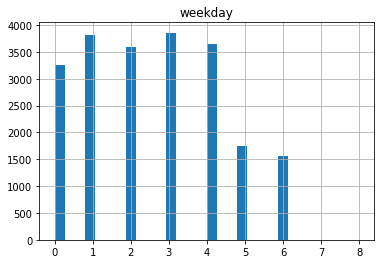

In [106]:
data.hist('weekday', bins = 30, range = (0, 8));

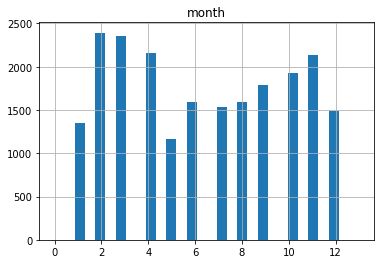

In [107]:
data.hist('month', bins = 30, range = (0, 13));

Чаще публикуют объявления в начале весны, в конце зимы и в течение рабочей недели, в пятницу и на выходных публикают объявления намного реже

### Как быстро продавались квартиры?

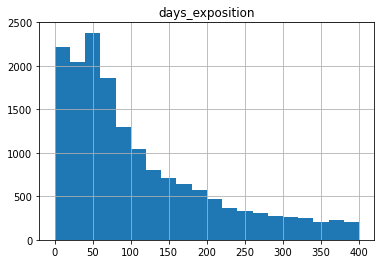

In [108]:
data.hist('days_exposition', bins = 20, range = (0,400));

По гистограмме видно, что большая часть квартир продается в первые 75 дней после публикации, то есть практически 2,5 месяца.

Найдем минимальное и максимальное значение по дням

In [109]:
# Минимум
data['days_exposition'].min()

1.0

In [110]:
# Максимум
data['days_exposition'].max()

1580.0

В минимум в 1 день поверить довольно сложно, это должны быть прям единичные случаи, сама продажа не происходит так быстро, многим людям нужно время для принятия решения, хотя это все, конечно же, зависит от ее преимуществ и недостатков для каждого покупателя индивидуально. Если квартира выше среднего, удовлетворяет достаточному числу параметров (цена, расстояние до метро, ремонт и т.д.) ее очень быстро заберут. А максимум в 1580 дней уже интереснее, практически 4 года продавать квартиру, возможно дело в завышенной цене и других параметрах квартиры (количество комнат, площадь и т.д.). Например, однокомнатные квартиры покупают быстрее, чем трехкомнатные.

Найдем среднее значение и медиану

In [111]:
# Среднее значение
data['days_exposition'].mean()

175.75862252501597

In [112]:
# Медиана
data['days_exposition'].median()

92.0

Значения явно завышены из-за выбросов. Найдем среднее и медиану выделив срез данных. За условие примем дни публикации меньше 200, это чуть больше полугода.

In [113]:
data.loc[data['days_exposition'] < 200, 'days_exposition'].mean()

72.04385318396227

In [114]:
data.loc[data['days_exposition'] < 200, 'days_exposition'].median()

60.0

Эти зачения уже выглядят правдоподобно. В среднем квартира продается за 72 дня, половина квартир в первые 60 дней, вторая в последующие дни. Если принимать во внимание здравый смысл и информацию в интернете, то можно понять, что это стандартные показатели. Быстрыми продажами можно считать продажи в первые 25 дней (на гистограмме показано, что довольно большое количество квартир продаюеся именно в этот период). Долгими продажами можно считать те, которые уже прошли порог в полгода, однако тут интереснее было бы посмотреть в группировке с количеством комнат, цене, площади и т.д.

### Какие факторы больше всего влияют на общую стоимоcть объекта?

#### Цена и общая площадь

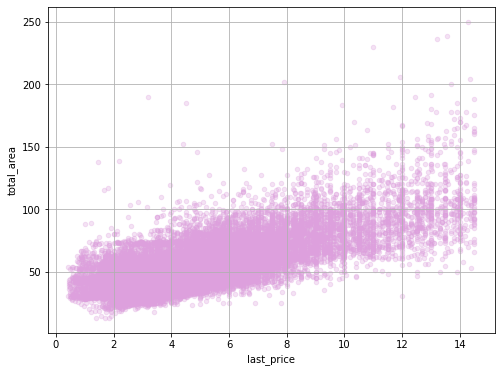

In [115]:
# Рассмотрим как зависит цена от общей площади квартиры
data.plot(
    y = 'total_area', x = 'last_price', kind = 'scatter', alpha = 0.3, figsize = (8,6), grid = True, color = 'plum'
);

In [116]:
# Найдем корреляцию
data['last_price'].corr(data['total_area'])

0.7403749852364376

Итог: да, **цена зависит от общей площади квартиры**, причем достаточно хорошо, зависимость линейна - это видно по диаграмме рассеяния.

#### Цена и жилая площадь

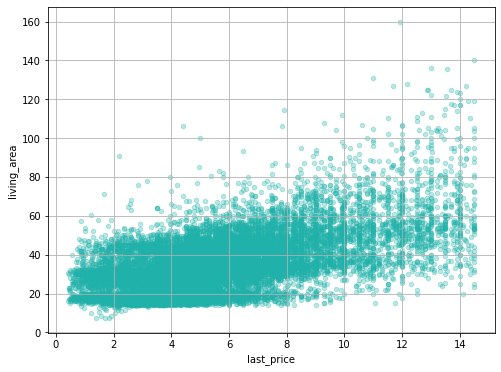

In [117]:
# Рассмотрим как зависит цена от жилой#### Цена и жилая площадь# Найдем корреляцию
data.plot(
    y = 'living_area', x = 'last_price', kind = 'scatter', alpha = 0.3, figsize = (8,6), grid = True, color = 'lightseagreen'
);

In [118]:
# Найдем корреляцию
data['last_price'].corr(data['living_area'])

0.6356846229343318

Итог: **цена зависит и от жилой площади квартиры**, но уже чуть меньше, корреляция здесь 0.63, в то время как у общей площади 0.74

#### Цена и площадь кухни

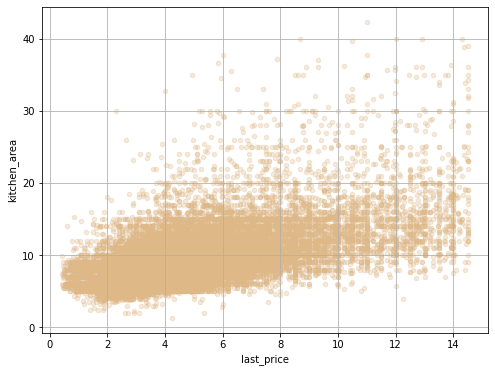

In [119]:
# Рассмотрим как зависит цена от площади кухни
data.plot(
    y = 'kitchen_area', x = 'last_price', kind = 'scatter', alpha = 0.3, figsize = (8,6), grid = True, color = 'burlywood'
);

In [120]:
# Найдем корреляцию
data['last_price'].corr(data['kitchen_area'])

0.5663631676104371

Итог: **цена может зависеть от жилой площади квартиры**, но эта корреляция уступает предыдущим двум, поэтому пока что лучшим фактором для цены является общая площадь

#### Цена и количество комнат

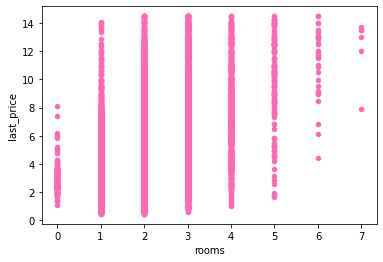

In [121]:
# Рассмотрим как зависит цена от количества комнат
data.plot(
    y = 'last_price', x = 'rooms', kind = 'scatter', color = 'hotpink'
);

In [122]:
# Найдем корреляцию
data['last_price'].corr(data['rooms'])

0.48572483781361825

Итог: **уже не такая ярко выраженная зависимость**, этот фактор проигрывает предыдущим, он уже не входит в топ 3 фактора для цены

#### Цена и тип этажа

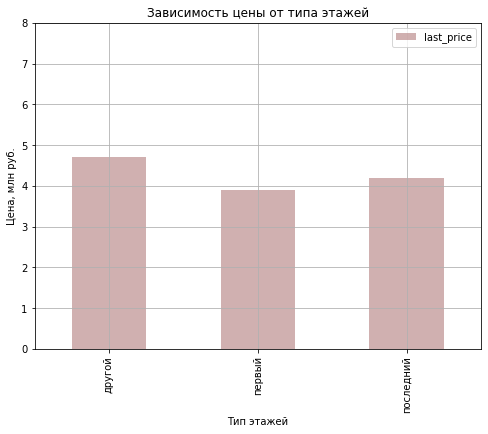

In [123]:
# Рассмотрим как зависит цена от типа этажа
data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = 'median').plot(
    kind = 'bar',
    title = ('Зависимость цены от типа этажей'),
    ylim = (0, 8),
    alpha = 0.7,
    grid = True,
    color = 'rosybrown',
    figsize = (8,6)
);
plt.xlabel("Тип этажей"),
plt.ylabel("Цена, млн руб.")
plt.show()

Итог: по графику видно, что первый этаж уступает двум другим типам по цене, последний этаж по цене выше первого, но все же ниже типа "другой". ЭТо может быть обусловлено отсутствием лифта в доме, а квартиры на первых этажах не так популярны в плане выбора среди покупателей

#### Цена и год публикации продажи

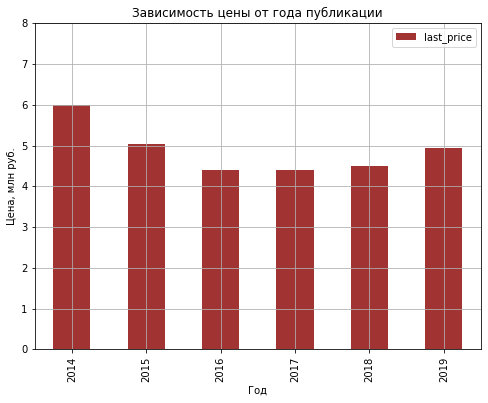

In [124]:
# Рассмотрим как зависит цена от года публикации продажи
data.pivot_table(index = 'year', values = 'last_price', aggfunc = 'median').plot(
    kind = 'bar',
    title = ('Зависимость цены от года публикации'),
    ylim = (0, 8),
    alpha = 0.8,
    grid = True,
    color = 'darkred',
    figsize = (8,6)
);
plt.xlabel("Год"),
plt.ylabel("Цена, млн руб.")
plt.show()

Итог: по графику мы можем понять, что как таковой зависимости здесь нет, с 2014 по 2016 цены понижались, а затем более плавно стали повышаться. Возможно, это может говорить о тенденции на будущие пару лет, однако данный параметр зависит от многих факторов, от той же экономической ситуации в стране

#### Цена и месяц публикации продажи

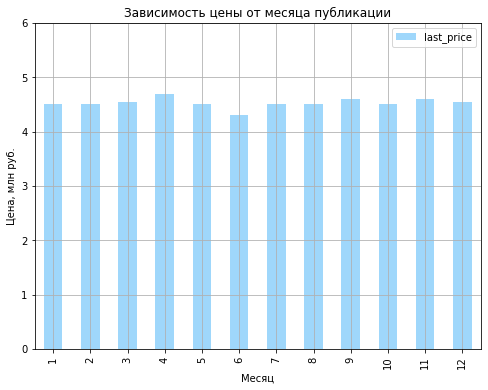

In [125]:
# Рассмотрим как зависит цена от месяца публикации продажи
data.pivot_table(index = 'month', values = 'last_price', aggfunc = 'median').plot(
    kind = 'bar',
    title = ('Зависимость цены от месяца публикации'),
    ylim = (0, 6),
    alpha = 0.8,
    grid = True,
    color = 'lightskyblue',
    figsize = (8,6)
);
plt.xlabel("Месяц"),
plt.ylabel("Цена, млн руб.")
plt.show()

Итог: как таковой зависимости между месяцем и ценой нет, не прослеживается никакая логическая цепочка, только более резкий скачок вниз был с апреля по июнь, затем снова начала выравниваться

#### Цена и день публикации продажи

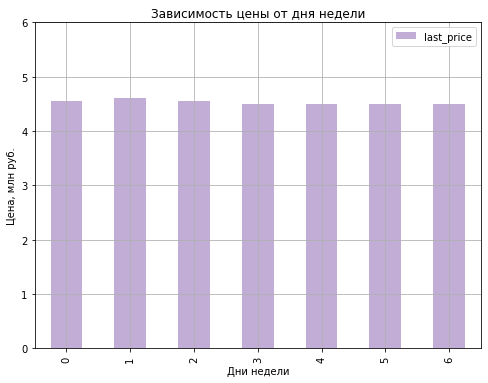

In [126]:
# Рассмотрим как зависит цена от дня недели публикации продажи
data.pivot_table(index = 'weekday', values = 'last_price', aggfunc = 'median').plot(
    kind = 'bar',
    title = ('Зависимость цены от дня недели'),
    ylim = (0, 6),
    color = 'rebeccapurple',
    alpha = 0.4,
    grid = True,
    figsize = (8,6)
);
plt.xlabel("Дни недели"),
plt.ylabel("Цена, млн руб.")
plt.show()

Итог: в данном случае зависимости тоже нет. Все дн  распределены более менее одинаково. Может совсем немного выше остальных по цене вторник, но вряд ли здесь есть веские факторы

<div style="border:solid teal 4px; padding: 20px">

**В итоге в топ 3 фактора для цены вошли:**

- общая площадь квартира
- жилая площадь квартиры
- площадь кухни

### Какие населенные пункты имеют самую низкую и самую высокую стоимость квадратного метра?

Посчитаем среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений.

In [127]:
# Сначала создадим сводную таблицу по населенным пунктам и ценам за один квадратный метр,
# посчитаем число объявлений и среднюю по цене
local_meters = data.pivot_table(index = 'locality_name', values = 'price_for_meter', aggfunc = ['mean', 'count'])

In [128]:
# Переменуем столбцы
local_meters.columns = ['mean', 'count']

In [129]:
# Отсортируем 10 населенных пунктов с наибольшим количеством объявлений
local_meters_sorted = local_meters.sort_values(by = 'count', ascending = False).round().head(10)
local_meters_sorted

,mean,count
locality_name,,
Санкт-Петербург,106637.0,14167
Мурино,85777.0,552
Кудрово,95138.0,458
поселок Шушары,77717.0,420
Всеволожск,67156.0,386
Пушкин,100926.0,337
Колпино,75209.0,330
Гатчина,69017.0,304
поселок Парголово,89341.0,299


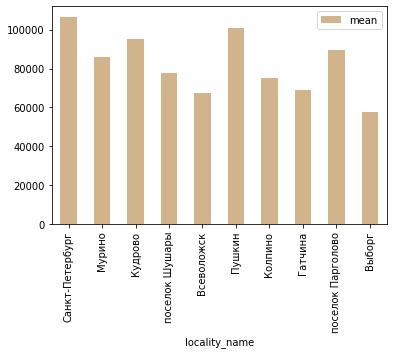

In [130]:
# Построим график
local_meters.sort_values(by = 'count', ascending = False).round().head(10).plot(y = 'mean', kind = 'bar', color = 'tan');

<div style="border:solid teal 4px; padding: 20px">

**В итоге в топ 3 населенных пункта с самой высокой стоимостью квадратного метра вошли (из 10 населенных пунктов с самым больишм количество публикаций):**

- Санкт-Петербург
- Пушкин
- Поселок Парголово

**В топ 3 населенных пункта с самой низкой стоимостью квадратного метра вошли:**
    
- Выборг
- Всеволожск
- Гатчина

### Как стоимость объектов зависит от расстояния до центра города?

Посчитаем среднюю цену каждого километра в расстоянии до центра в Санкт-Петербурге.

In [131]:
# Отберем строки по Санкт-Петербургу, и сделаем сводную таблицу
spb_center_km = data.loc[data['locality_name'] == 'Санкт-Петербург'].pivot_table(
    index = 'city_centers_nearest_km', values = 'last_price', aggfunc = ['mean', 'count']
)

In [132]:
# Переменуем столбцы
spb_center_km.columns = ['mean', 'count']

In [133]:
# Отсортируем и выведем на экран
spb_center_km.sort_values(by = 'mean', ascending = True)

,mean,count
city_centers_nearest_km,,
24.0,3.854430,26
25.0,4.121957,23
29.0,4.236667,6
26.0,4.402229,35
23.0,4.666259,81
18.0,4.841598,252
19.0,4.933658,148
17.0,4.986317,847
28.0,5.026429,7


Две квартиры с расстоянием от центра в 27 км можно отнести к аномалиям, и чтобы график получился лаконичнее, уберем данные по этому километру

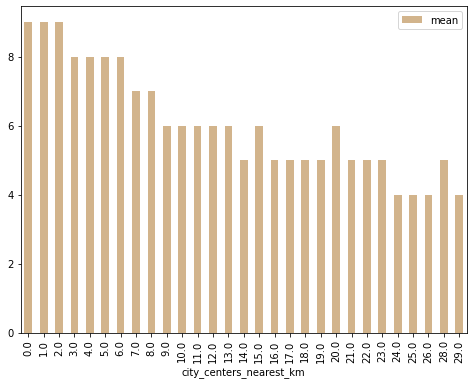

In [134]:
# Построим график
spb_center_km.query('city_centers_nearest_km != 27').round().plot(
    y = 'mean', figsize = (8,6), kind = 'bar', color = 'tan'
);

<div style="border:solid teal 4px; padding: 20px">

В целом чем дальше от центра города, тем ниже средняя цена, однако под конец данные ведут себя немного по-другому. На это могут быть разные причины, возможно там находятся дейтсивтельно хорошие районы.

## Общий вывод

<div class = "alert alert-info" style = "border-color: info; border-radius: 5px"> 
    <font color = 'black'>
        
Мы проанализировали данные, сделали предобработку и выявили несколько закономерностей, которые могут быть полезны для дальнейших исследований. 
        
Мы овтетили на три главных вопроса данной работы:
        
**1. Какие факторы больше всего влияют на общую стоимоcть объекта?** 
- общая площадь квартиры, жилая площадь и площадь кухни

**2. Какие населенные пункты имеют самую низкую и самую высокую стоимость квадратного метра?**
- Санкт-Петербург, Пушкин и Поселок Парголово вошли в топ 3 по самой высокой стоимостью.
- А в топ 3 населенных пункта с самой низкой стоимостью квадратного метра вошли Выборг, Всеволожск и Гатчина.

**3. Как стоимость объектов зависит от расстояния до центра города?**
- Все же больше прослеживается тенденция к снижению цены по мере увеличения расстояния
        
К сожалению в данных было огромное количество пропусков, если бы их не было мы могли бы получить более достоверные результаты и интересные выводы. Было бы также хорошо проанализировать влияние парков и водоемов на цены и популярность среди покупателей.